In [288]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random
import glob

In [560]:
def distortedCapture(full_img, x, y, img_size):
#     rotate full image (ra), capture (d, s), flip (flip)
    ra = random.randint(0,359)
    dx = (random.randint(0,10)-5)
    dy = (random.randint(0,10)-5)
    scale = (1.5) - 1
    sx = int(random.randint(0,img_size*scale)-img_size*scale/2)
    sy = int(random.randint(0,img_size*scale)-img_size*scale/2)
    flip = random.randint(0,3)-1
    
    M = cv.getRotationMatrix2D((x,y), ra, 1)
    full_img = cv.warpAffine(full_img, M, (frame.shape[1], frame.shape[0]))
    
    down_b = y-16+dy-sy
    up_b = y+16+dy+sy
    left_b = x-16+dx-sx
    right_b = x+16+dx+sx
#     print(down_b,":",up_b ,",", left_b,":",right_b)
    if (down_b < 0 or up_b>full_img.shape[0] or left_b<0 or right_b>full_img.shape[1]):
        return distortedCapture(full_img, x,y,img_size)
    
    ball_img = full_img[y-16+dy-sy : y+16+dy+sy , x-16+dx-sx : x+16+dx+sx]
    ball_img = cv.resize(ball_img, (img_size, img_size))
    
    
    if (flip != 2):
        ball_img = cv.flip(ball_img, flipCode=flip)
    
    
    return ball_img

In [592]:
# SPLIT TRAINING AND VALIDATION DATA

split = 0.9

files = glob.glob("ball_data/*full.npy")
print(files)
files.remove("ball_data/ball+_data_full.npy")

for file in files:
    ball_data = np.load(file)
    print(ball_data.shape)
    split_int = int(ball_data.shape[0] * split)
    train = ball_data[:split_int]
    test = ball_data[split_int:]
    
    np.save(file[0:-8]+"train.npy", train)
    np.save(file[0:-8]+"test.npy", test)


['ball_data/ball+_data_LB_3_full.npy', 'ball_data/ball+_data_SBCC_2_full.npy', 'ball_data/ball+_data_LB_1_full.npy', 'ball_data/ball+_data_full.npy', 'ball_data/ball+_data_SBCC_1_full.npy', 'ball_data/ball+_data_NP_1_full.npy']
(216, 32, 32, 3)
(105, 32, 32, 3)
(183, 32, 32, 3)
(255, 32, 32, 3)
(282, 32, 32, 3)


In [548]:
# LOAD FRAMES

PLACE = "NP"
NUM = 1

csv_name = "ball_pos_data/ball_pos_data_{}_{}_full.csv".format(PLACE, NUM)
vid_name = "videos/Tennis_{}_{}.mov".format(PLACE, NUM)

ball_centers = np.loadtxt(csv_name).astype(np.uint32)
num_rows = ball_centers.shape[0]

cap = cv.VideoCapture(vid_name)
num_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

iterations = 3
img_size = 32
data_qnty = ball_centers.shape[0] * int(iterations)
ball_data = np.zeros((data_qnty,img_size,img_size,3)).astype(np.uint8)

In [549]:
# CAPTURE PICTURE

distort = True

for it in range(iterations):
    cap = cv.VideoCapture(vid_name)
    
    for frame_idx in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            break
        rows_idx = np.where(ball_centers[:,0]==frame_idx)

        for row in rows_idx[0]:
            row_ = int(row+it*num_rows)
            print(row_)
            x = ball_centers[row, 1]
            y = ball_centers[row, 2]
            if distort:
                ball_data[row_] = distortedCapture(frame, x, y, img_size)
            else:
                ball_data[row] = frame[y-16:y+16, x-16:x+16]


#             plt.figure()
#             plt.imshow(cv.cvtColor(ball_data[row], cv.COLOR_BGR2RGB))

0
512 : 556 , 146 : 178
1
465 : 497 , 526 : 548
2
465 : 481 , 14 : 54
3
548 : 590 , 300 : 320
4
457 : 501 , 517 : 555
5
454 : 486 , 274 : 294
6
472 : 488 , 30 : 52
7
585 : 619 , 416 : 444
8
465 : 491 , 522 : 550
9
447 : 491 , 265 : 293
10
455 : 493 , 26 : 56
11
620 : 652 , 537 : 557
12
461 : 493 , 510 : 548
13
450 : 482 , 264 : 306
14
457 : 495 , 23 : 59
15
647 : 675 , 624 : 648
16
466 : 506 , 507 : 555
17
459 : 475 , 258 : 306
18
455 : 499 , 17 : 51
19
689 : 705 , 710 : 758
20
468 : 496 , 516 : 552
21
444 : 478 , 263 : 285
22
456 : 494 , 33 : 51
23
651 : 677 , 761 : 789
24
457 : 505 , 516 : 548
25
449 : 491 , 264 : 284
26
451 : 491 , 20 : 48
27
611 : 641 , 791 : 839
28
475 : 497 , 510 : 548
29
450 : 496 , 260 : 292
30
460 : 498 , 28 : 62
31
578 : 622 , 832 : 878
32
477 : 497 , 512 : 554
33
450 : 478 , 262 : 308
34
463 : 497 , 16 : 52
35
551 : 587 , 890 : 906
36
466 : 496 , 516 : 552
37
450 : 482 , 266 : 300
38
457 : 497 , 28 : 50
39
517 : 563 , 914 : 948
40
460 : 502 , 511 : 557
41
45

In [550]:
print(ball_data)

[[[[ 53  57  92]
   [ 54  56  93]
   [ 54  56  93]
   ...
   [ 60  71  79]
   [ 61  72  80]
   [ 62  73  81]]

  [[ 53  56  93]
   [ 53  56  93]
   [ 52  55  92]
   ...
   [ 60  72  78]
   [ 59  71  79]
   [ 60  72  80]]

  [[ 53  56  93]
   [ 53  56  93]
   [ 53  56  93]
   ...
   [ 59  72  79]
   [ 57  70  78]
   [ 59  72  80]]

  ...

  [[ 70  79  93]
   [ 60  71  82]
   [ 60  72  82]
   ...
   [ 64  79  88]
   [ 64  79  88]
   [ 64  79  89]]

  [[ 65  75  89]
   [ 60  71  82]
   [ 61  73  84]
   ...
   [ 64  79  88]
   [ 64  79  88]
   [ 64  79  88]]

  [[ 61  72  85]
   [ 59  73  82]
   [ 61  75  85]
   ...
   [ 64  79  88]
   [ 64  79  90]
   [ 64  79  90]]]


 [[[ 48  60  99]
   [ 48  60  99]
   [ 48  60  99]
   ...
   [ 46  57  99]
   [ 46  57  99]
   [ 47  57  99]]

  [[ 48  59  98]
   [ 48  60  99]
   [ 48  60 100]
   ...
   [ 47  55  98]
   [ 47  55  98]
   [ 48  56  99]]

  [[ 50  60 100]
   [ 49  60 101]
   [ 49  60 102]
   ...
   [ 48  56  99]
   [ 48  56  99]
   [ 48  56

In [551]:
# SAVE DATA TO FILE

np.save("ball_data/ball+_data_{}_{}_full.npy".format(PLACE, NUM), ball_data)

In [594]:
# COMBINE DATA

type_ = 'train'

data_files = glob.glob('ball_data/*'+ type_+ '.npy')
if ("ball_data/ball+_data_" + type_ + ".npy" in data_files):
    data_files.remove("ball_data/ball+_data_" + type_ + ".npy")

data = np.load(data_files[0])

for i in range(1, len(data_files)):
    data2 = np.load(data_files[i])
    data = np.concatenate((data, data2))
print(data.shape)
np.save("ball_data/ball+_data_"+ type_+ ".npy", data)

(934, 32, 32, 3)


In [558]:
# VALUE TRANSFORM

data = np.load("ball_data/ball+_data_full.npy")
for i in range(int(data.shape[0])):
    hsv = cv.cvtColor(data[i,:,:,:], cv.COLOR_BGR2HSV)
    
    max_v = np.max(hsv[:,:,2])
    
    small_shifted = hsv.copy().astype(np.uint32)
    small_shifted[:,:,2] = small_shifted[:,:,2] + int(255-max_v)
    small_shifted[(small_shifted[:,:,2]>255),2] = 255
    small_shifted[(small_shifted[:,:,2]<0),2] = 0
    small_shifted[:,:,1] = small_shifted[:,:,1] + 60
    
    rgb = cv.cvtColor(small_shifted.astype(np.uint8), cv.COLOR_HSV2RGB)
    bgr = cv.cvtColor(small_shifted.astype(np.uint8), cv.COLOR_HSV2BGR)
    
    data[i,:,:,:] = bgr
    
#     plt.figure()
#     plt.imshow(rgb)
np.save("ball_data/ball+_data.npy", data)

139.22529375
129.9015875
96.71306875
108.713203125
131.457284375
138.42270625
130.428065625
139.126840625


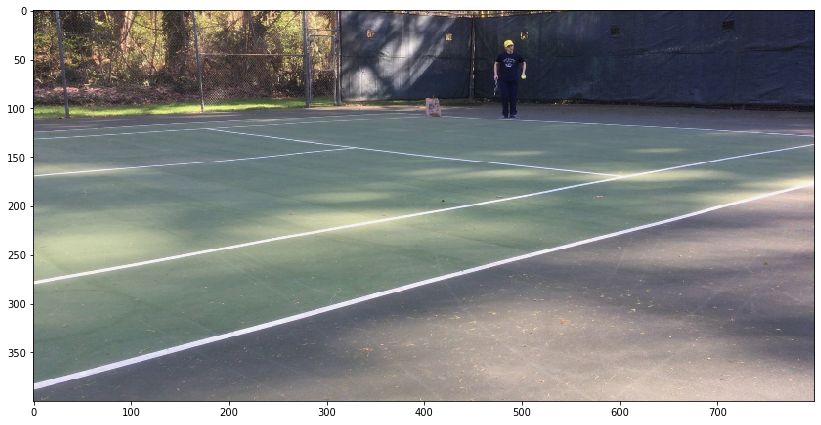

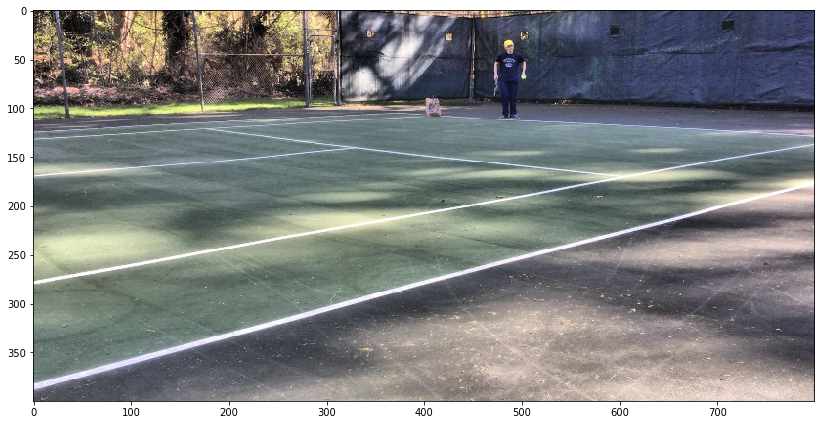

<Figure size 1008x576 with 0 Axes>

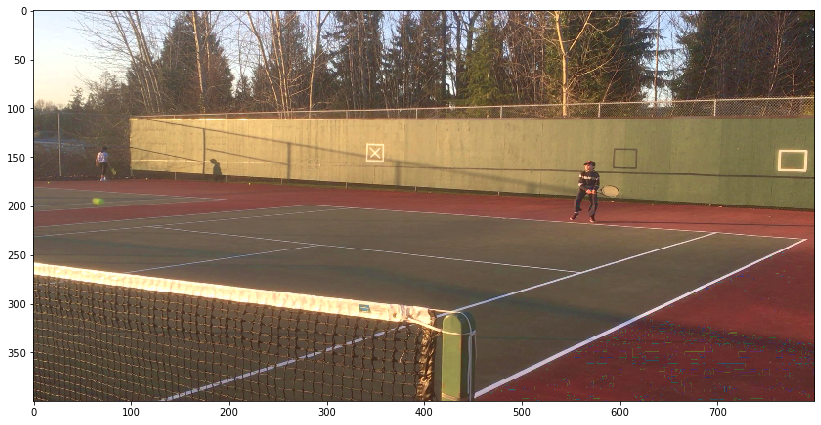

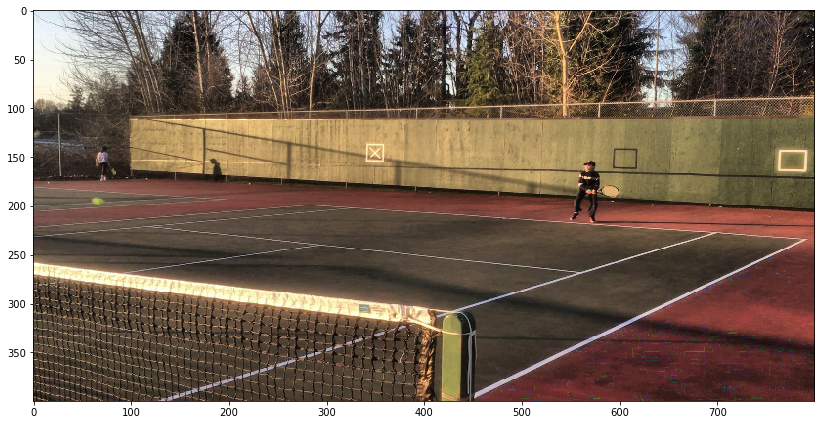

<Figure size 1008x576 with 0 Axes>

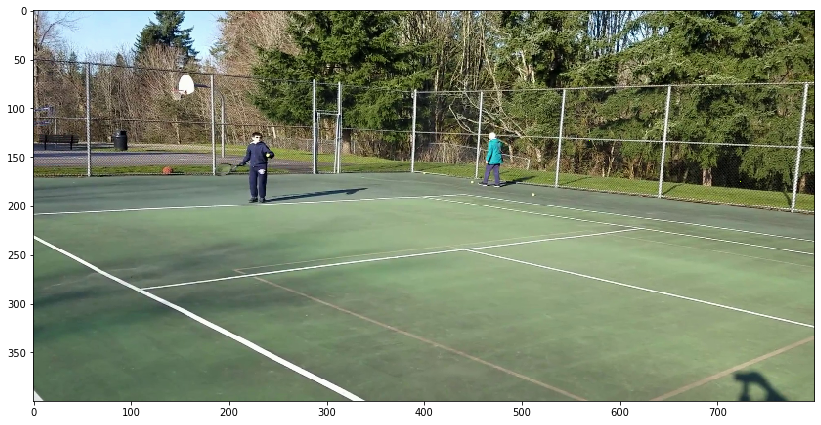

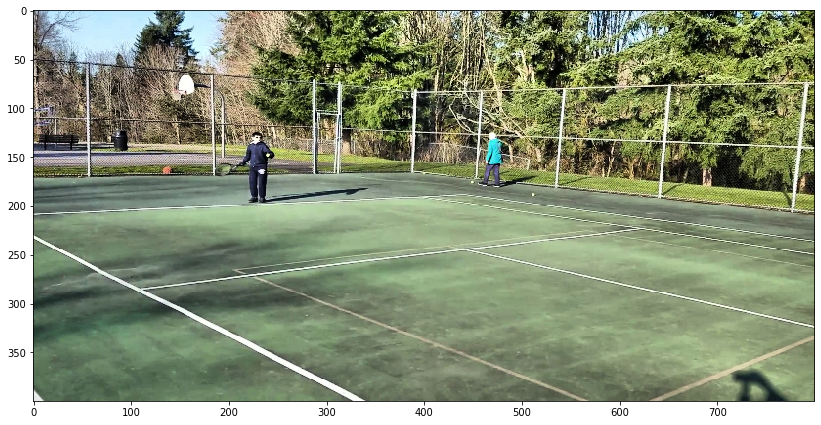

<Figure size 1008x576 with 0 Axes>

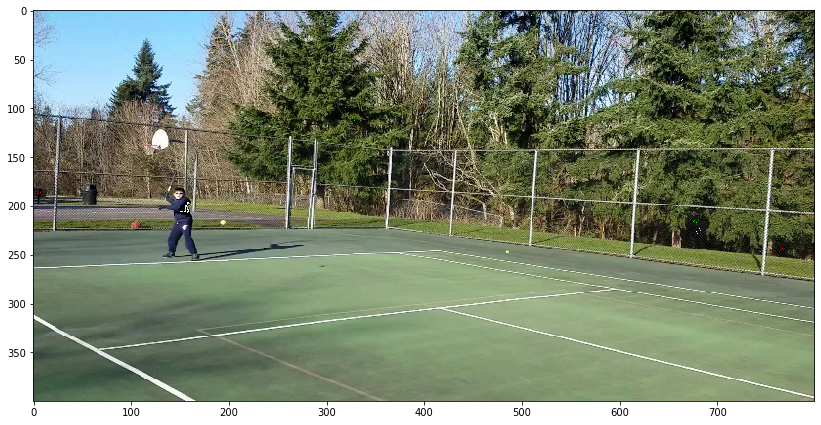

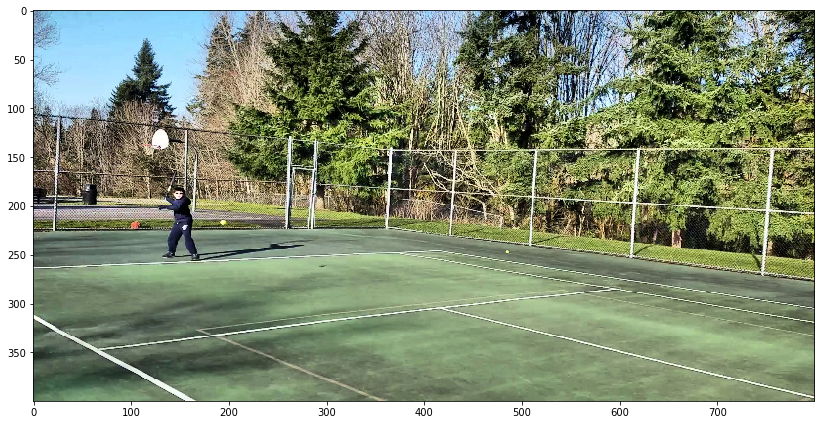

<Figure size 1008x576 with 0 Axes>

In [448]:
# ATTEMPT AT NORMALIZATION

imgs = glob.glob("pictures/*.JPG")

for fname in imgs:
    img = cv.cvtColor(cv.imread(fname), cv.COLOR_BGR2HSV)
    small = cv.resize(img, (800,400))
    # img_norm = cv.normalize(small, None, 0, 255, cv.NORM_MINMAX)
    
    img_equ = small.copy()
    img_equ[:,:,2] = cv.equalizeHist(small[:,:,2])
    
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_equ2 = small.copy()
    img_equ2[:,:,2] = clahe.apply(small[:,:,2])
    
    mean_v = np.mean(small[:,:,2])
    small_shifted = small.copy().astype(np.uint32)
    small_shifted[:,:,2] = small_shifted[:,:,2] + int(128-mean_v)
    small_shifted[(small_shifted[:,:,2]>255),2] = 255
    small_shifted[(small_shifted[:,:,2]<0),2] = 0
    print(mean_v)
    print(np.mean(img_equ2[:,:,2]))
    
    plt.figure(figsize=(14,8))
    plt.imshow(cv.cvtColor(small_shifted.astype(np.uint8), cv.COLOR_HSV2RGB))
    plt.figure(figsize=(14,8))
    plt.imshow(cv.cvtColor(img_equ2, cv.COLOR_HSV2RGB))
    plt.figure(figsize=(14,8))
#     small_forhist = cv.resize(img, (200,100))
#     plt.hist(small_forhist[:,:,2], bins=50)
    



# for i in range(3):
#     plt.figure()
#     small = cv.resize(img_norm, (250,500))
#     plt.hist(small[:,:,i])
#     plt.show()